/home/vijay/miniconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


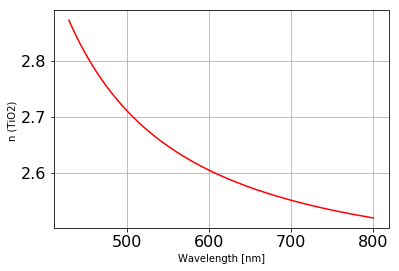

/home/vijay/miniconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


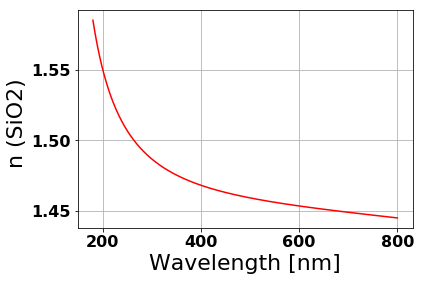

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sys
import numpy
import scipy as sp

import matplotlib.pyplot as plt
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 22}

# wavelength lamda vary from 430 nm to 800nm
lam = np.linspace(0.43, 0.8,1000)
#using expression Devore 1951
eta_Tio2=5.913+0.2441/(lam**2-0.0803)
#plt.figure(figsize=(14, 6))
eta_Tio2=np.sqrt(eta_Tio2)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.ylabel('n (TiO2) ')
plt.xlabel('Wavelength [nm]')
plt.plot(lam*1000,eta_Tio2,'r')
plt.rc('font', **font)
plt.grid('on')
plt.show()
#np.savetxt("TiO2.csv", eta, delimiter=',', fmt='%0.3f')   # X is an array
lam1 = np.linspace(0.18, 0.8,1000)
eta_sio2=1+0.6961663*lam1**2/(lam1**2-(0.0684043)**2)+0.4079426*lam1**2/(lam1**2-0.1162414**2)+0.8974794*lam1**2/(lam1**2-9.896161*2)
eta_sio2=np.sqrt(eta_sio2)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.ylabel('n (SiO2) ')
plt.xlabel('Wavelength [nm]')
plt.plot(lam1*1000,eta_sio2,'r')
#plt.plot(lam*1000,eta_Tio2,'b')
plt.rc('font', **font)
plt.grid('on')
plt.show()
#np.savetxt("SiO2.csv", eta, delimiter=',', fmt='%0.3f')   # X is an array

In [2]:
def refind(lam):
    #using expression Devore 1951
    #eta_Tio2=5.913+244.1*1e3/(lam**2-80.3)
    eta_Tio2=5.913+0.2441/(lam**2-0.0803)
    #lam1=lam
    eta_Sio2=1+0.6961663*lam**2/(lam**2-(0.0684043)**2)+0.4079426*lam**2/(lam**2-0.1162414**2)+0.8974794*lam**2/(lam**2-9.896161*2)

    return eta_Tio2,eta_Sio2
eta_Tio2,eta_Sio2=refind(0.700)
n_Tio2=np.sqrt(eta_Tio2)
n_Sio2=np.sqrt(eta_Sio2)
print("eta_Tio2= ",eta_Tio2,"eta_Tio2= ",n_Tio2)
print("eta_Sio2= ",eta_Sio2,"eta_Sio2= ",n_Sio2)
           

eta_Tio2=  6.508801806199658 eta_Tio2=  2.5512353490416477
eta_Sio2=  2.099606158235943 eta_Sio2=  1.4490017799284938


In [3]:
lam=632.8e-9    # Incident Optical wavelength 
k0=2*np.pi/lam  # Incident light wavevector
theta_res=np.linspace(62.5, 66, num=20)
print(theta_res)
KBSW= k0*1.5*np.sin(theta_res*np.pi/180)
print(KBSW)


[62.5        62.68421053 62.86842105 63.05263158 63.23684211 63.42105263
 63.60526316 63.78947368 63.97368421 64.15789474 64.34210526 64.52631579
 64.71052632 64.89473684 65.07894737 65.26315789 65.44736842 65.63157895
 65.81578947 66.        ]
[13210935.7640673  13232978.12542054 13254883.70102804 13276652.26445775
 13298283.59069386 13319777.45613916 13341133.63861733 13362351.91737523
 13383432.07308521 13404373.88784735 13425177.14519173 13445841.63008066
 13466367.1289109  13486753.42951588 13507000.32116786 13527107.59458017
 13547075.04190931 13566902.45675714 13586589.63417297 13606136.37065575]


In [14]:
"""  
Phase matching in Grating Design
Date:May 31 2019
By Khem Poudel MTSU

"""
lam=700e-9    # Incident Optical wavelength 
k0=2*np.pi/lam  # Incident light wavevector
theta_res=np.linspace(62.5, 66, num=20)
print(theta_res)
KBSW= k0*1.5*np.sin(theta_res*np.pi/180)
print(KBSW)

#Program to calculate the angles of coupling of a single incident
# wavelength on a MLS grating of order N
import numpy as np

N=3            # Order of the MLS grating
Nt=(2**N)-1     # Number of elements 

k0=2*np.pi/lam  # Incident light wavevector
LAMD=1920e-9    # Period of the entire length of 1 repeat of the MLS  517.6 or 1920e-9
kBSW=np.max(KBSW) # Wave vector of the BSW taken from reflectivity angle 
print(kBSW)


kvec=np.zeros(Nt)
ANG=np.zeros(Nt)

for k in range(Nt):
    kvec[k]=((2*np.pi)/LAMD)*(k+1)
    ANG[k]=(np.arcsin((kBSW-kvec[k])/k0/1.32))*(180/np.pi)

print('The coupling angles in degrees are', ANG)

[62.5        62.68421053 62.86842105 63.05263158 63.23684211 63.42105263
 63.60526316 63.78947368 63.97368421 64.15789474 64.34210526 64.52631579
 64.71052632 64.89473684 65.07894737 65.26315789 65.44736842 65.63157895
 65.81578947 66.        ]
[11942685.93071684 11962612.22538017 11982414.86572935 12002093.64706981
 12021648.36598725 12041078.82034981 12060384.80931007 12079566.13330721
 12098622.59406903 12117553.99461401 12136360.13925333 12155040.83359292
 12173595.88453546 12192025.10028235 12210328.29033575 12228505.26550048
 12246555.83788602 12264479.82090846 12282277.02929237 12299947.2790728 ]
12299947.279072804
The coupling angles in degrees are [ 49.63378483  29.05971123  12.09430381  -3.82321266 -20.05229254
 -38.248773   -63.54398372]


In [5]:
"""  
Phase matching in Grating Design
Date:May 31 2019
By Khem Poudel MTSU

"""
#Program to calculate the angles of coupling of a single incident
# wavelength on a MLS grating of order N
import numpy as np
import matplotlib.pyplot as plt
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 25}

N=3            # Order of the MLS grating
Nt=(2**N)-1     # Number of elements 
lam=800e-9    # Incident Optical wavelength 
k0=2*np.pi/lam  # Incident light wavevector
LAMD=1300e-9    # Period of the entire length of 1 repeat of the MLS  517.6, 1600 did not work
kBSW=13197600   # Wave vector of the BSW taken from reflectivity angle 


kvec=np.zeros(Nt)
ANG=np.zeros(Nt)

for k in range(Nt):
    kvec[k]=((2*np.pi)/LAMD)*(k+1)
    ANG[k]=(np.arcsin((kBSW-kvec[k])/k0/1.33))*(180/np.pi)

print('The coupling angles in degrees are', ANG)


The coupling angles in degrees are [ 53.20095526  19.75788012  -7.1604888  -35.96877308          nan
          nan          nan]


/home/vijay/.local/lib/python3.6/site-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in arcsin


In [6]:
k0=2*np.pi/lam  # Incident light wavevector
n_sup=1.33
n_sub=1.5 # Prism Coupling
theta_critc=np.arcsin(n_sup/n_sub)*(180/np.pi) # so BSW resonance must be M
print("Critical Angle",theta_critc)



Critical Angle 62.4573248455412


In [7]:
lam=700e-9    # Incident Optical wavelength 
k0=2*np.pi/lam  # Incident light wavevector
theta_res=np.linspace(62.5, 66, num=20)
print(theta_res)
KBSW= k0*1.5*np.sin(theta_res*np.pi/180)
print(KBSW)


[62.5        62.68421053 62.86842105 63.05263158 63.23684211 63.42105263
 63.60526316 63.78947368 63.97368421 64.15789474 64.34210526 64.52631579
 64.71052632 64.89473684 65.07894737 65.26315789 65.44736842 65.63157895
 65.81578947 66.        ]
[11942685.93071684 11962612.22538017 11982414.86572935 12002093.64706981
 12021648.36598725 12041078.82034981 12060384.80931007 12079566.13330721
 12098622.59406903 12117553.99461401 12136360.13925333 12155040.83359292
 12173595.88453546 12192025.10028235 12210328.29033575 12228505.26550048
 12246555.83788602 12264479.82090846 12282277.02929237 12299947.2790728 ]


In [8]:
lam=632.8e-9    # Incident Optical wavelength 
k0=2*np.pi/lam  # Incident light wavevector
theta_res=np.linspace(62.5, 66, num=20)
print(theta_res)
KBSW= k0*1.5*np.sin(theta_res*np.pi/180)
print(KBSW)
"""  
Phase matching in Grating Design
Date:May 31 2019
By Khem Poudel MTSU

"""
#Program to calculate the angles of coupling of a single incident
# wavelength on a MLS grating of order N
import numpy as np

N=3            # Order of the MLS grating
Nt=(2**N)-1     # Number of elements 
lam=700e-9    # Incident Optical wavelength 
k0=2*np.pi/lam  # Incident light wavevector
LAMD=1920e-9    # Period of the entire length of 1 repeat of the MLS  517.6 or 1920e-9
kBSW=11942685.93071684  # Wave vector of the BSW taken from reflectivity angle 


kvec=np.zeros(Nt)
ANG=np.zeros(Nt)

for k in range(Nt):
    kvec[k]=((2*np.pi)/LAMD)*(k+1)
    ANG[k]=(np.arcsin((kBSW-kvec[k])/k0/1.33))*(180/np.pi)

print('The coupling angles in degrees are', ANG)


[62.5        62.68421053 62.86842105 63.05263158 63.23684211 63.42105263
 63.60526316 63.78947368 63.97368421 64.15789474 64.34210526 64.52631579
 64.71052632 64.89473684 65.07894737 65.26315789 65.44736842 65.63157895
 65.81578947 66.        ]
[13210935.7640673  13232978.12542054 13254883.70102804 13276652.26445775
 13298283.59069386 13319777.45613916 13341133.63861733 13362351.91737523
 13383432.07308521 13404373.88784735 13425177.14519173 13445841.63008066
 13466367.1289109  13486753.42951588 13507000.32116786 13527107.59458017
 13547075.04190931 13566902.45675714 13586589.63417297 13606136.37065575]
The coupling angles in degrees are [ 34.1797942    7.07654135 -18.38504257 -48.93787726          nan
          nan          nan]


/home/vijay/.local/lib/python3.6/site-packages/ipykernel_launcher.py:30: RuntimeWarning: invalid value encountered in arcsin


[1.64275376 1.66264459 1.68230397 1.70172452 1.72089892 1.73981998
 1.75848056 1.77687367 1.79499237 1.81282985]
[1.64309036 1.66299243 1.68266292 1.70209445 1.72127969 1.74021144
 1.75888257 1.77728607 1.79541501 1.81326258]
[1.64342696 1.66334027 1.68302188 1.70246437 1.72166045 1.7406029
 1.75928458 1.77769847 1.79583765 1.8136953 ]
[1.64376356 1.66368811 1.68338083 1.7028343  1.72204122 1.74099435
 1.75968658 1.77811087 1.79626029 1.81412802]
[1.64410016 1.66403595 1.68373978 1.70320423 1.72242199 1.74138581
 1.76008859 1.77852327 1.79668294 1.81456075]


/home/vijay/miniconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/vijay/miniconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


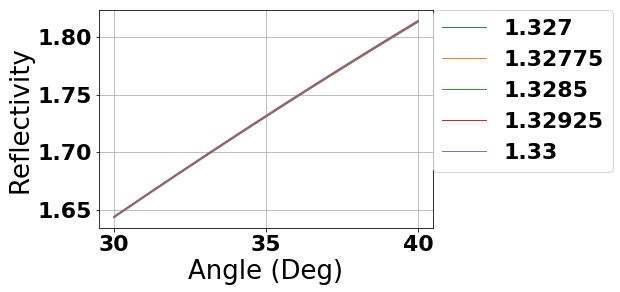

In [9]:
KB=[]
eta_sup1=np.linspace(1.327, 1.33, num=5)
for e in eta_sup1:
    

    theta_in=np.linspace(30, 40, num=10)
    KBcal=k0*e*np.sin(theta_in*np.pi/180)+2*(np.pi)*2/LAMD
    plt.plot(theta_in, KBcal/1e07,linewidth=1,label=e)
    
    print(KBcal/1e7)
    
#plt.plot(anglePeriodic1_33, reflectionPeriodic1_33,'r',linewidth=3,label="Periodic1_33")
#plt.plot(angleMLS1_330000, reflectionMLS1_330000,'b--',linewidth=3,label="MLS1_33")
#plt.plot(angleMLS1_330005, reflectionMLS1_330005,'r',linewidth=3,label="MLS1_330")



plt.legend(bbox_to_anchor=(1.0, 1), loc=2, borderaxespad=0.)
#plt.legend(loc=0)
plt.ylabel("Reflectivity",fontsize=26)
plt.xlabel("Angle (Deg)",fontsize=26)
#plt.gca().set_xlim(left=6.10, right=6.15)
plt.rc('font', **font)
#plt.ylim(-2, 2)
plt.grid('on')
plt.show()


In [10]:
1920/4

480.0

/home/vijay/miniconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/vijay/miniconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


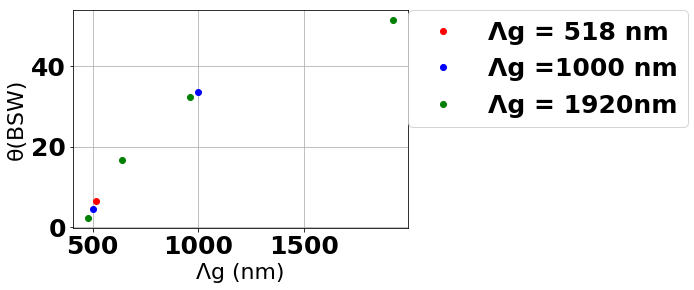

In [11]:
x1=518
x2=[1000,500]
x3=[1920,1920/2,1920/3,1920/4]
Gp1=[6.41] # at Lambda=632.8
Gp2=[33.67,4.51]
Gp3=[51.49,32.32,16.67,2.24]

plt.plot(x1,Gp1,  'ro',label="Λg = 518 nm" )
plt.plot(x2,Gp2 , 'bo',linewidth=3,label="Λg =1000 nm")
plt.plot(x3,Gp3 , 'go',linewidth=3,label="Λg = 1920nm")

plt.legend(bbox_to_anchor=(1.0, 1), loc=2, borderaxespad=0.)
#plt.legend(loc=0)
#plt.xticks([])
plt.ylabel("θ(BSW)",fontsize=22)
plt.xlabel("Λg (nm)",fontsize=22)
#plt.gca().set_xlim(left=6.10, right=6.15)
plt.rc('font', **font)
#plt.xlim(500, 2000)
plt.grid('on')

plt.show()
